### RESUBMIT: Grant Aguinaldo, Homework 2, SSIE 637

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import itertools

pd.set_option('display.float_format', '{:.5f}'.format)
%matplotlib inline

### Question 1

In [2]:
arm_data = [{'idx': 1, 'transaction': ['Hotdogs', 'Sandwich', 'Jam']}, 
            {'idx': 2, 'transaction': ['Hotdogs', 'Sandwich']}, 
            {'idx': 3, 'transaction': ['Hotdogs', 'Milk', 'Chips']},
            {'idx': 4, 'transaction': ['Chips', 'Milk']},
            {'idx': 5, 'transaction': ['Chips', 'Jam']},
            {'idx': 6, 'transaction': ['Hotdogs', 'Milk', 'Chips']}]

nested_list = [each['transaction'] for each in arm_data]


flat_item_list = [each for each_j in nested_list for each in each_j]
count_dict = Counter(flat_item_list)

num_transactions = len(count_dict)

### Step 1

In [3]:
step_01_count = [{'item': each,
                  'count_freq': count_dict[each] / \
                  (num_transactions)} for each in \
                   count_dict if count_dict[each] >= (1/3)]
step_01_count
step_01_df = pd.DataFrame(step_01_count)

step_01_df.sort_values(by='count_freq', ascending=False)

,item,count_freq
0,Hotdogs,0.80000
4,Chips,0.80000
3,Milk,0.60000
1,Sandwich,0.40000
2,Jam,0.40000


### Step 2

In [4]:
unique_items = list(count_dict.keys())
cart_prod_2 = list(itertools.combinations(unique_items, 2))
cart_prod_list = [list(each) for each in cart_prod_2]

# Shows all of the ways to produce a basket of 
# two items from the set, `['Chips', 'Jam', 'Sandwich', 
#                            'Hotdogs', 'Milk']`

cart_prod_list

[['Hotdogs', 'Sandwich'],
 ['Hotdogs', 'Jam'],
 ['Hotdogs', 'Milk'],
 ['Hotdogs', 'Chips'],
 ['Sandwich', 'Jam'],
 ['Sandwich', 'Milk'],
 ['Sandwich', 'Chips'],
 ['Jam', 'Milk'],
 ['Jam', 'Chips'],
 ['Milk', 'Chips']]

In [5]:
transaction_list = nested_list

step_02_discard = []
step_02_count = []
for each in cart_prod_list:
    counter = 0
    for eachi in transaction_list:
        if set(each).issubset(eachi):
            counter += 1
        elem = {'item': each,
                'count_freq': counter / num_transactions}
    if counter / num_transactions >= (1/3):
        step_02_count.append(elem)
    else:
        step_02_discard.append(elem)
        
# =====================
step_02_count 
step_02_df = pd.DataFrame(step_02_count)
step_02_df

,item,count_freq
0,"[Hotdogs, Sandwich]",0.40000
1,"[Hotdogs, Milk]",0.40000
2,"[Hotdogs, Chips]",0.40000
3,"[Milk, Chips]",0.60000


In [6]:
step_02_discard

[{'item': ['Hotdogs', 'Jam'], 'count_freq': 0.2},
 {'item': ['Sandwich', 'Jam'], 'count_freq': 0.2},
 {'item': ['Sandwich', 'Milk'], 'count_freq': 0.0},
 {'item': ['Sandwich', 'Chips'], 'count_freq': 0.0},
 {'item': ['Jam', 'Milk'], 'count_freq': 0.0},
 {'item': ['Jam', 'Chips'], 'count_freq': 0.2}]

In [7]:
step_02_discard_list = [each for each in step_02_discard] 

In [8]:
flat_item_list = [each for each_j in [x for x in cart_prod_list \
                                      if x not in step_02_discard_list] \
                                      for each in each_j]
unique_item_2 = set(flat_item_list)
step_02_count_unique = list(unique_item_2)
step_02_count_unique

['Hotdogs', 'Sandwich', 'Chips', 'Jam', 'Milk']

### Step 3

In [9]:
cart_prod_3 = list(itertools.combinations(set(step_02_count_unique), 3))
cart_prod_list = [list(each) for each in cart_prod_3]

# Shows all of the ways to produce a basket of 
# three items from the set, `['Chips', 'Jam', 'Sandwich', 
#                            'Hotdogs', 'Milk']`

cart_prod_list

[['Hotdogs', 'Sandwich', 'Chips'],
 ['Hotdogs', 'Sandwich', 'Jam'],
 ['Hotdogs', 'Sandwich', 'Milk'],
 ['Hotdogs', 'Chips', 'Jam'],
 ['Hotdogs', 'Chips', 'Milk'],
 ['Hotdogs', 'Jam', 'Milk'],
 ['Sandwich', 'Chips', 'Jam'],
 ['Sandwich', 'Chips', 'Milk'],
 ['Sandwich', 'Jam', 'Milk'],
 ['Chips', 'Jam', 'Milk']]

In [10]:
step_03_count = []
for each in cart_prod_3:
    counter = 0
    for eachi in transaction_list:
        if set(each).issubset(eachi):
            counter += 1
        elem = {'item': list(each),
                'count_freq': counter * (1/num_transactions)}
        if counter * (1/num_transactions) >= (1/3):
            step_03_count.append(elem)
# =====================
step_03_df = pd.DataFrame(step_03_count)
step_03_df

,item,count_freq
0,"[Hotdogs, Chips, Milk]",0.40000


In [11]:
step_03_count

[{'item': ['Hotdogs', 'Chips', 'Milk'], 'count_freq': 0.4}]

### Step 4 and Question 1 Conclusion

From the final set of items, `('Milk', 'Hotdogs','Chips')`, you can create **six** rules:

- Rule 1:  `('Hotdogs','Chips') -> ('Milk')`
- Rule 2:  `('Milk','Chips') -> ('Hotdogs')`
- Rule 3:  `('Hotdogs','Milk') -> ('Chips')`
- Rule 4:  `('Milk') -> ('Hotdogs','Chips')`
- Rule 5:  `('Hotdogs') -> ('Milk','Chips') `
- Rule 6:  `('Chips') -> ('Hotdogs','Milk') `

Overall, the formula for computing the confidence of $c(X \rightarrow Y)$ is: $ \frac{\sigma (X \cup Y) }{\sigma (X) } $. Therefore, the corresponding confidence values, can be computed from the data in `step_01_df`, `step_02_df`, and `step_03_df`.

- For `Rule 1`, the confidence value can be computed as $ \sigma (Milk, Hotdogs, Chips) $ / $\sigma (Hotdogs, Chips)$: `0.4 / 0.4 = 1`

- For `Rule 2`, the confidence value can be computed as $ \sigma (Milk, Hotdogs, Chips) $ / $\sigma (Milk, Chips)$: `0.4 / 0.6 = 0.667`

- For `Rule 3`, the confidence value can be computed as $ \sigma (Milk, Hotdogs, Chips) $ / $\sigma (Hotdogs, Milk)$: `0.4 / 0.4 = 1`

- For `Rule 4`, the confidence value can be computed as $ \sigma (Milk, Hotdogs, Chips) $ / $\sigma (Milk)$: `0.4 / 0.6 = 0.667`

- For `Rule 5`, the confidence value can be computed as $ \sigma (Milk, Hotdogs, Chips) $ / $\sigma (Hotdogs)$: `0.4 / 0.8 = 0.5`

- For `Rule 6`, the confidence value can be computed as $ \sigma (Milk, Hotdogs, Chips) $ / $\sigma (Chips)$: `0.4 / 0.8 = 0.5`

**Conclusion** `Rules 1, 2, 3, and 4` is the only rule that has a confidence $\gt$ 0.6. In addition, these results suggests **four** outcomes: first, people who buy `('Hotdogs','Chips')` also tend to buy `('Milk')`, second, people who buy `('Milk','Chips')` also tend to buy `('Hotdogs')`, third, people who tend to buy `('Hotdogs','Milk')` tend to buy `('Chips')`, and four, people who buy `('Milk')` also tend to buy `('Hotdogs','Chips')`.

### Question 2

See attached `pdf` file for the response to Question 2.

### Question 3

For this work, we first plotted the data to get an idea of how many clusters might we expect from the data. From the intial scatter plot, we see that there are about five clusters that we might expect.

In addition, we also ran k-Means clustering and varied the value of `k`. From the charts presented in Figure 2-11, we see that once $k \gt 5$, we see that the model starts to split up the data within each cluster (e.g., See Figure 7).

In [12]:
with open('random_data.txt') as f:
    data = f.readlines()

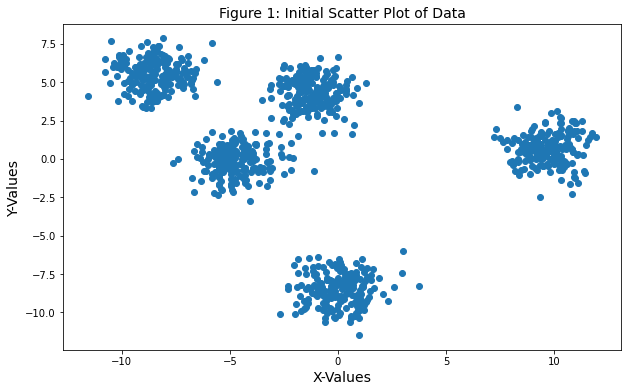

In [13]:
data_np = np.array([each.split() for each in data])
X = [float(each) for each in data_np[:,0]]
Y = [float(each) for each in data_np[:,1]]
data_km = np.column_stack((X, Y))

# Plot data to get an idea of how many clusters might we expect.
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.xlabel('X-Values', fontsize=14)
plt.ylabel('Y-Values', fontsize=14)
plt.title('Figure 1: Initial Scatter Plot of Data', fontsize=14)
plt.show()

In [14]:
def create_clusters(idx, num_clusters=None):
    num_clusters = num_clusters
    km = KMeans(n_clusters = num_clusters, random_state=42).fit(data_km)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data_km[:,0], data_km[:,1], c=km.labels_.astype(float))
    plt.scatter(x=list(km.cluster_centers_[:,0]), 
                y=list(km.cluster_centers_[:,1]), 
                c='r', s=50, marker='X')
    
    plt.xlabel('X-Values', fontsize=14)
    plt.ylabel('Y-Values', fontsize=14)
    string = 'Figure ' + str(idx + 2) + ': Scatter Plot with ' + str(num_clusters) + ' Cluster Centroids'
    
    plt.title(string, fontsize=14)
    plt.show()

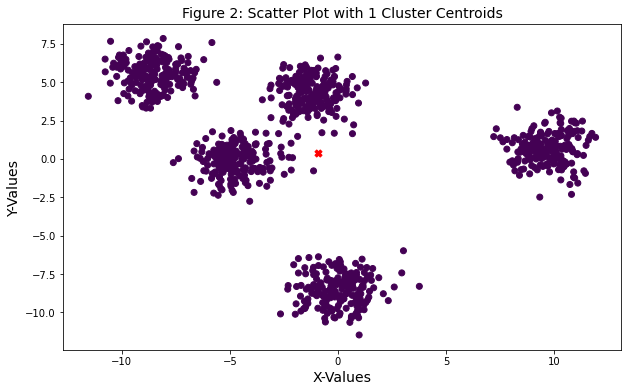

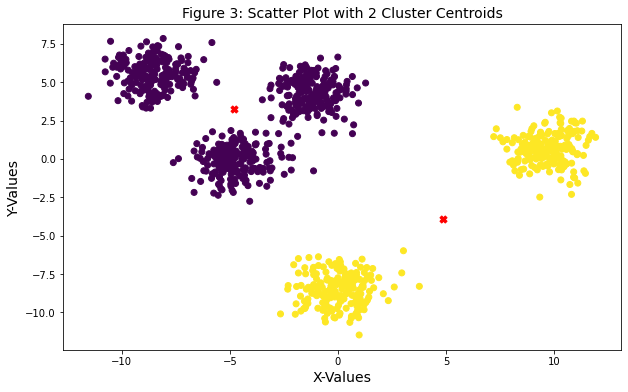

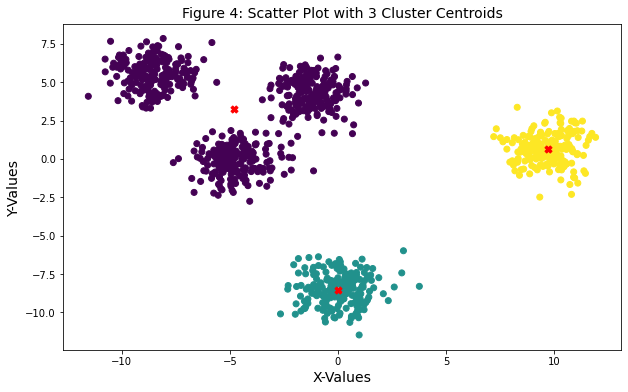

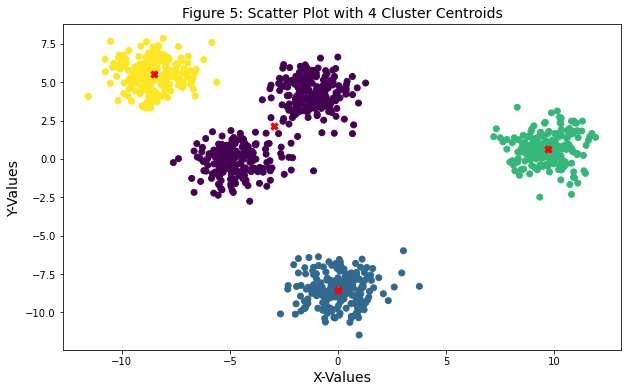

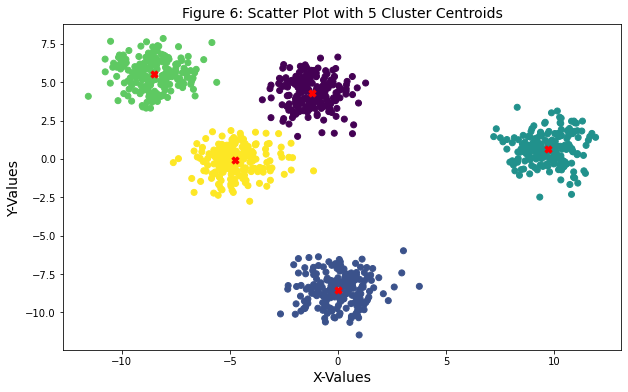

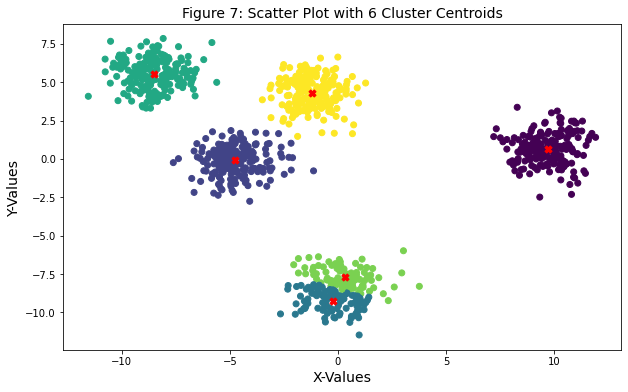

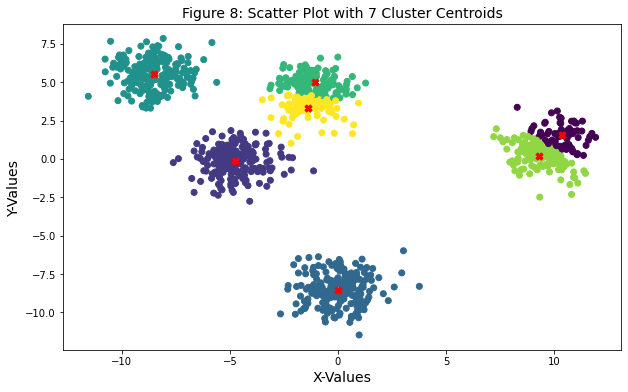

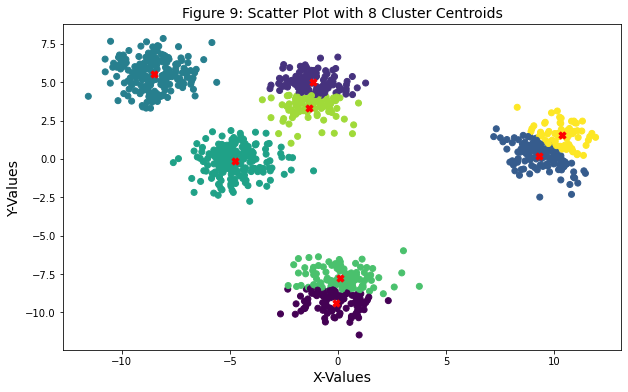

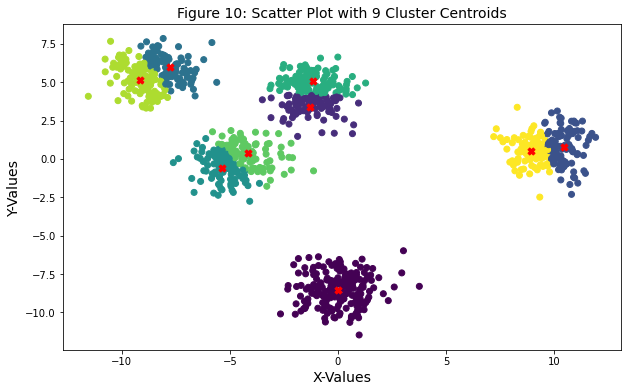

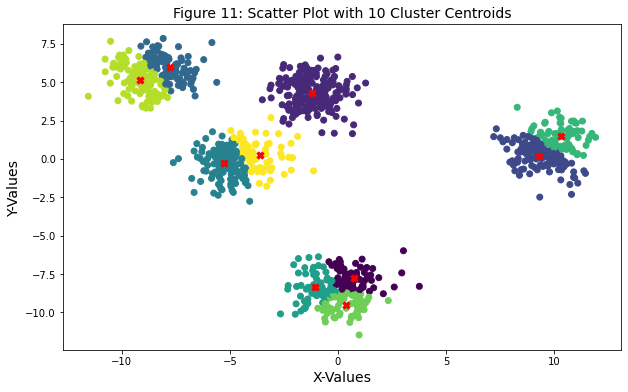

In [15]:
for idx, each in enumerate(range(1, 10+1)):
    create_clusters(idx=idx, num_clusters=each)

### Question 4

In [16]:
def point_distance(point_list=None, centroid_pos=None):
    
    '''
    input: 
        point_list: a two item list that contains 
                    the `x` and `y` coord. of each 
                    point. 
        
        centroid_pos: a two item list that contains 
                    the `x` and `y` coord. of each 
                    centroid. 
    output:
        distance: the squared distance between the 
                  datapoint and the position of the 
                  centroid.
    '''
    
    point_x = point_list[0]
    point_y = point_list[1]

    centroid_pos_x = centroid_pos[0]
    centroid_pos_y = centroid_pos[1]

    distance = ((point_x - centroid_pos_x) + (point_y - centroid_pos_y))**2

    return distance

In [17]:
def kmeans_cluster_func(n_clusters=None, data=None):
    n_clusters = n_clusters
    km = KMeans(n_clusters = n_clusters, random_state=42).fit(data)
    
    point_dict = {each+1: data[np.where(km.labels_ == each)[0]] for each in range(km.n_clusters)}
    centroid_points = {idx+1: each for idx, each in enumerate(km.cluster_centers_)}
    
    return centroid_points, point_dict

In [18]:
def error_function(n_clusters=None):
    data_n_clusters = kmeans_cluster_func(n_clusters=n_clusters, data=data_km)
    dict_data_centroids = data_n_clusters[0]
    dict_data_points = data_n_clusters[1]

    sum_data_points = []

    for idx, each in enumerate(dict_data_centroids.values()):
        centroid_pos_x = each[0]
        centroid_pos_y = each[1]

        distance_data_points = []

        for idx_i, each_ in enumerate(dict_data_points[idx+1]):

            point_x = each_[0]
            point_y = each_[1]

            '''
            Sum of square distance. We are only computing the 
            sum of the errors for the points within each cluster 
            since all of the other values are `0` as
            indicated in Formula 1 of the homework (see the 
            support for `a_{nk}` in the homework) . We 
            take this value to be the "sum of square distances, 
            within each cluster."
            '''
            
            distance = np.absolute((point_x - centroid_pos_x) + (point_y - centroid_pos_y))**2
            distance_data_points.append(distance)
            total = np.sum(distance_data_points)
            
        sum_data_points.append(total)
    return np.sum(sum_data_points)

In [19]:
elbow_data = [{'n_clusters': each, 
               'sum_square_error': error_function(n_clusters=each)} for each in range(1, 10+1)]

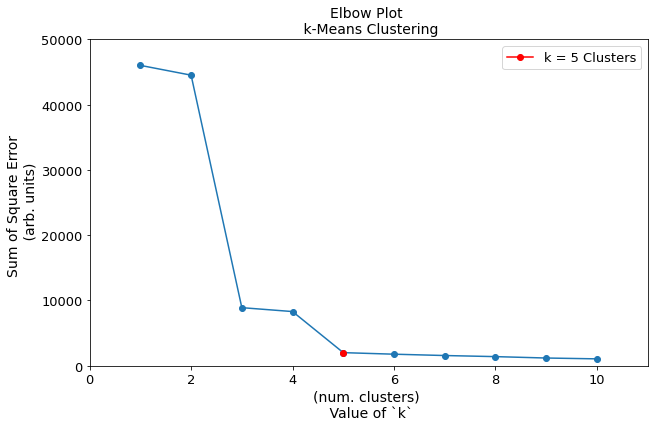

In [20]:
x = [each['n_clusters'] for each in elbow_data]
y = [each['sum_square_error'] for each in elbow_data]
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.plot(elbow_data[4]['n_clusters'], 
         elbow_data[4]['sum_square_error'], 
         marker='o', 
         color='red', 
         label='k = 5 Clusters')
plt.ylim(0, 50000, 10000)
plt.xlim(0, 11)
plt.xlabel('(num. clusters) \n Value of `k`', fontsize=14)
plt.ylabel('Sum of Square Error \n (arb. units)', fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title('Elbow Plot \n k-Means Clustering', fontsize=14)
plt.legend(fontsize=13)
plt.show()